## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
# Keep only top 10000 most frequently occuring words in the training data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Each review is a list of word indices (encoding a sequence of words)
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [4]:
# Because we are restricting to top 10K most frequent words, no word will exceed 10K
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [5]:
# We can't feed list of integers to NN because they all have different lengths
# Two ways to convert the list to tensors:
# a) Pad the lists so they all have same length
#    (e.g. Embedding() layer)
# b) Multi-hot encode your lists to turn them into 0s and 1s
#    (e.g. [8,5] would be 10K-dimensional vectors with 1s only at indices 5 and 8)
# We will implement the (b) solution here:
import numpy as np
def multi_hot_encode(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i][sequence] = 1.
    return results
x_train = multi_hot_encode(train_data)
x_test = multi_hot_encode(test_data)

In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
x_train[0].shape

(10000,)

# Vectorize the labels

In [7]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [8]:
print(y_train.shape)
print(y_train)

(25000,)
[1. 0. 0. ... 0. 1. 0.]


### Building your model

**Model definition**

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [10]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

- validation_data is to monitor the loss and accuracy on the 10,000 samples we set apart in the cell above

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.6663 - loss: 0.6374 - val_accuracy: 0.8565 - val_loss: 0.4304
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8864 - loss: 0.3579 - val_accuracy: 0.8835 - val_loss: 0.3023
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9291 - loss: 0.2217 - val_accuracy: 0.8900 - val_loss: 0.2754
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9535 - loss: 0.1589 - val_accuracy: 0.8884 - val_loss: 0.2771
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9668 - loss: 0.1230 - val_accuracy: 0.8825 - val_loss: 0.2923
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9789 - loss: 0.0889 - val_accuracy: 0.8811 - val_loss: 0.3177
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9863 - loss: 0.0634 - val_accuracy: 0.8819 - val_loss: 0.3380
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9920 - loss: 0.0471 - val_accuracy: 0.8792 - v

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

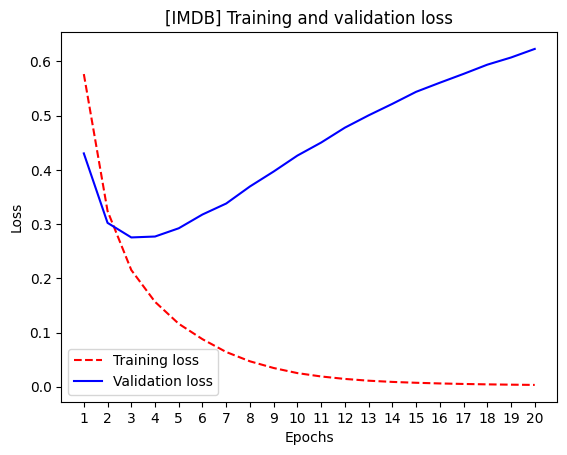

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r--", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("[IMDB] Training and validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

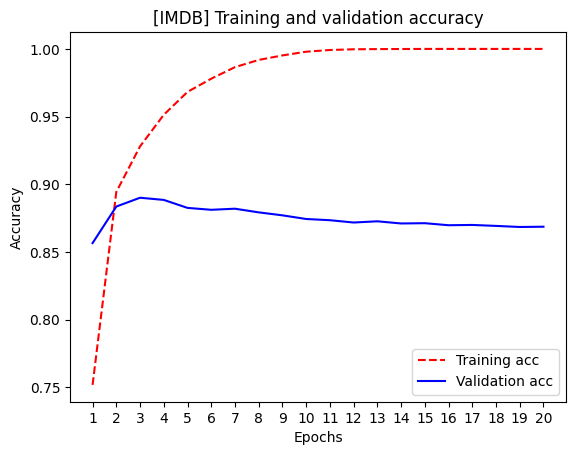

In [15]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "r--", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("[IMDB] Training and validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**  
Overfitting: After the fourth epoch, we are overoptimizing on the training data

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# We can now use the full training data
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6547 - loss: 0.6126
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9077 - loss: 0.2905
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9340 - loss: 0.1939
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9508 - loss: 0.1498


In [17]:
results = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8806 - loss: 0.3041


In [18]:
results

[0.30289340019226074, 0.8821200132369995]

### Using a trained model to generate predictions on new data

In [19]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.18815376],
       [0.9988517 ],
       [0.80447847],
       ...,
       [0.13539365],
       [0.0617744 ],
       [0.60484236]], dtype=float32)

### Further experiments  
We used two representation layers before the final classification layer.
How does the validation and accuracy change when we use:
1. one or three representation layers instead?
2. more units or fewer units: 32 units, 64 units, and so on?
3. `mse` loss instead of `binary_crossentropy`?
4. `tanh` activation instead of `relu`?


## 1 and 3 representation layers

### def plot_accuracy(history_dict)

In [28]:
def plot_accuracy(history_dict):
    plt.clf()
    acc = history_dict["accuracy"]
    val_acc = history_dict["val_accuracy"]
    plt.plot(epochs, acc, "r--", label="Training acc")
    plt.plot(epochs, val_acc, "b", label="Validation acc")
    plt.title("[IMDB] Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.xticks(epochs)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

### def plot_loss(history_dict)

In [26]:
def plot_loss(history_dict):
    plt.clf()
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, "r--", label="Training loss")
    plt.plot(epochs, val_loss_values, "b", label="Validation loss")
    plt.title("[IMDB] Training and validation loss")
    plt.xlabel("Epochs")
    plt.xticks(epochs)
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

## Compile and fit 1 layer model

In [35]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# generate new history with this model to graph the val metrics
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.6364 - loss: 0.6443 - val_accuracy: 0.8490 - val_loss: 0.4554
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8865 - loss: 0.3837 - val_accuracy: 0.8820 - val_loss: 0.3392
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9292 - loss: 0.2660 - val_accuracy: 0.8891 - val_loss: 0.2984
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9411 - loss: 0.2135 - val_accuracy: 0.8889 - val_loss: 0.2828
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9557 - loss: 0.1729 - val_accuracy: 0.8858 - val_loss: 0.2859
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9632 - loss: 0.1445 - val_accuracy: 0.8873 - val_loss: 0.2802
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9718 - loss: 0.1234 - val_accuracy: 0.8850 - val_loss: 0.2845
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9754 - loss: 0.1093 - val_accuracy: 0.8838 - v

### Plot 1 layer accuracy and loss

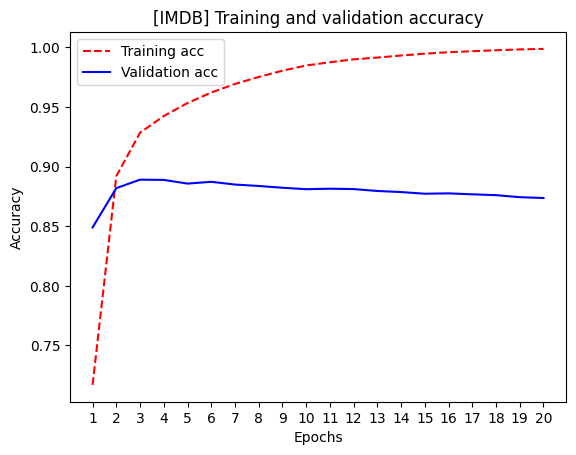

In [37]:
plot_accuracy(history.history)

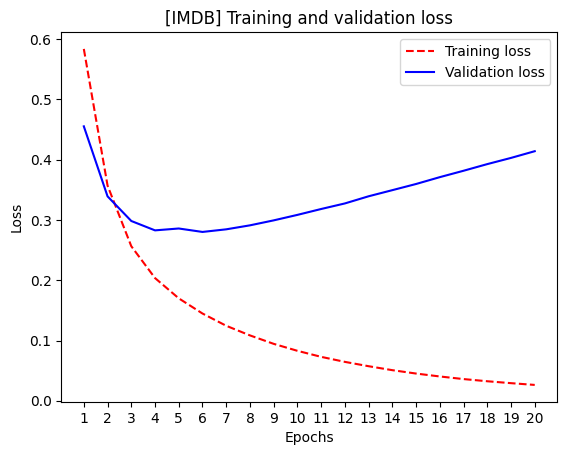

In [38]:
plot_loss(history.history)

## Compile and fit 3 layer

In [39]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# generate new history with this model to graph the val metrics
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.6404 - loss: 0.6472 - val_accuracy: 0.8585 - val_loss: 0.4203
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8979 - loss: 0.3362 - val_accuracy: 0.8887 - val_loss: 0.2902
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9391 - loss: 0.1931 - val_accuracy: 0.8889 - val_loss: 0.2800
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9616 - loss: 0.1314 - val_accuracy: 0.8838 - val_loss: 0.3113
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9730 - loss: 0.0977 - val_accuracy: 0.8795 - val_loss: 0.3275
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9854 - loss: 0.0660 - val_accuracy: 0.8780 - val_loss: 0.3695
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9917 - loss: 0.0467 - val_accuracy: 0.8780 - val_loss: 0.4031
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9972 - loss: 0.0289 - val_accuracy: 0.8748 - v

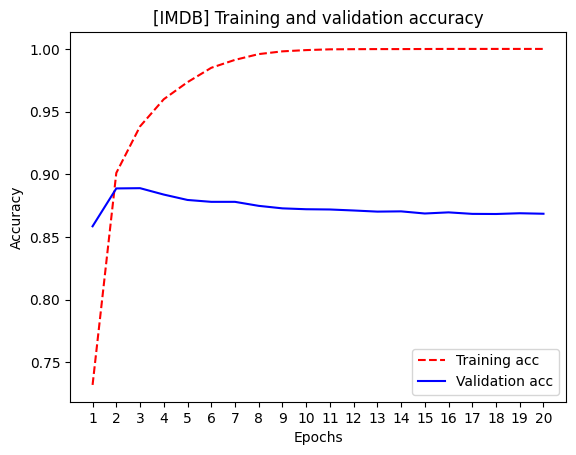

In [40]:
plot_accuracy(history.history)

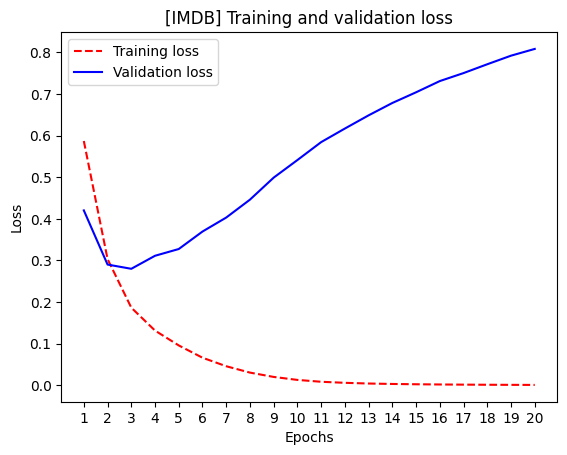

In [41]:
plot_loss(history.history)

## 32 and 64 units

In [42]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# generate new history with this model to graph the val metrics
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.6956 - loss: 0.6051 - val_accuracy: 0.8709 - val_loss: 0.3422
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9102 - loss: 0.2640 - val_accuracy: 0.8862 - val_loss: 0.2815
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9486 - loss: 0.1621 - val_accuracy: 0.8832 - val_loss: 0.2865
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9667 - loss: 0.1158 - val_accuracy: 0.8828 - val_loss: 0.3060
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9807 - loss: 0.0826 - val_accuracy: 0.8813 - val_loss: 0.3406
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9909 - loss: 0.0529 - val_accuracy: 0.8788 - val_loss: 0.3822
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9957 - loss: 0.0378 - val_accuracy: 0.8746 - val_loss: 0.4230
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9976 - loss: 0.0246 - val_accuracy: 0.8737 - v

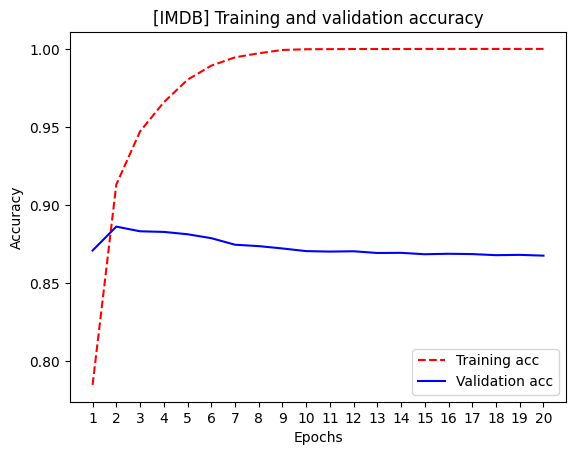

In [43]:
plot_accuracy(history.history)

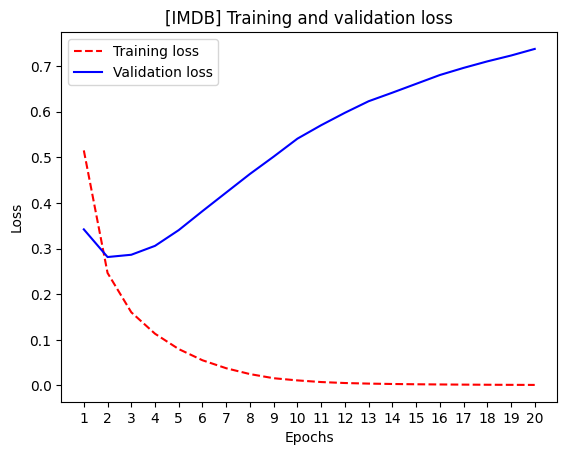

In [44]:
plot_loss(history.history)

### 64 units

In [45]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# generate new history with this model to graph the val metrics
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.7233 - loss: 0.5586 - val_accuracy: 0.8745 - val_loss: 0.3058
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.9265 - loss: 0.2032 - val_accuracy: 0.8873 - val_loss: 0.2843
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9609 - loss: 0.1242 - val_accuracy: 0.8811 - val_loss: 0.3123
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9807 - loss: 0.0748 - val_accuracy: 0.8790 - val_loss: 0.3663
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9922 - loss: 0.0439 - val_accuracy: 0.8753 - val_loss: 0.4157
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9976 - loss: 0.0226 - val_accuracy: 0.8718 - val_loss: 0.4762
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9997 - loss: 0.0121 - val_accuracy: 0.8721 - val_loss: 0.5293
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9998 - loss: 0.0066 - val_accuracy: 0.8709 -

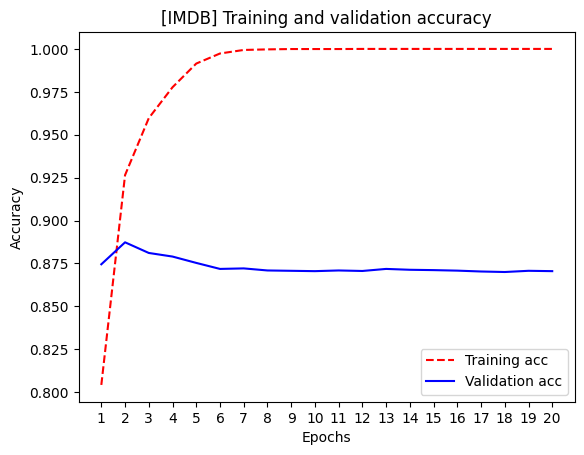

In [46]:
plot_accuracy(history.history)

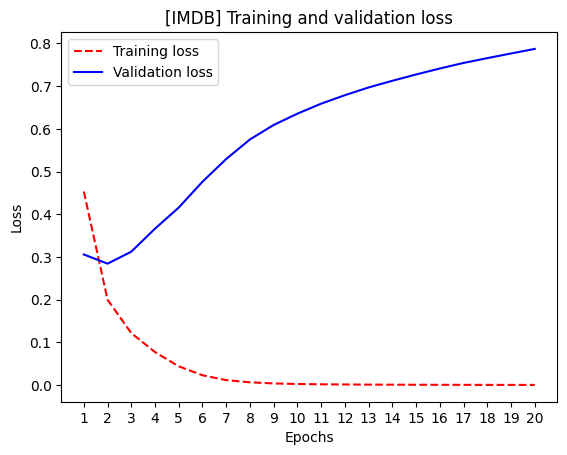

In [47]:
plot_loss(history.history)

## MSE loss

In [48]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])
# generate new history with this model to graph the val metrics
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.7041 - loss: 0.2144 - val_accuracy: 0.8629 - val_loss: 0.1184
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9022 - loss: 0.0918 - val_accuracy: 0.8818 - val_loss: 0.0918
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9342 - loss: 0.0602 - val_accuracy: 0.8892 - val_loss: 0.0840
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9565 - loss: 0.0441 - val_accuracy: 0.8886 - val_loss: 0.0830
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9710 - loss: 0.0332 - val_accuracy: 0.8847 - val_loss: 0.0840
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9798 - loss: 0.0263 - val_accuracy: 0.8812 - val_loss: 0.0860
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9835 - loss: 0.0213 - val_accuracy: 0.8774 - val_loss: 0.0890
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9895 - loss: 0.0154 - val_accuracy: 0.8756 - v

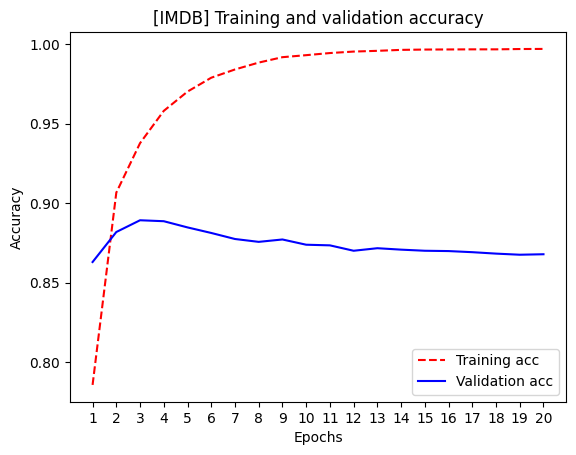

In [49]:
plot_accuracy(history.history)

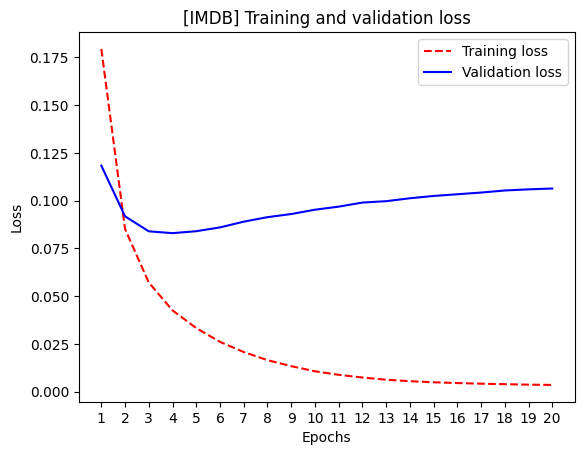

In [50]:
plot_loss(history.history)

## Tanh activation

In [51]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# generate new history with this model to graph the val metrics
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.7020 - loss: 0.5864 - val_accuracy: 0.8663 - val_loss: 0.3664
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9037 - loss: 0.2945 - val_accuracy: 0.8874 - val_loss: 0.2884
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9434 - loss: 0.1935 - val_accuracy: 0.8900 - val_loss: 0.2739
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9601 - loss: 0.1424 - val_accuracy: 0.8888 - val_loss: 0.2812
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9780 - loss: 0.0995 - val_accuracy: 0.8832 - val_loss: 0.2972
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9844 - loss: 0.0742 - val_accuracy: 0.8798 - val_loss: 0.3201
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9916 - loss: 0.0541 - val_accuracy: 0.8759 - val_loss: 0.3488
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9955 - loss: 0.0391 - val_accuracy: 0.8737 - v

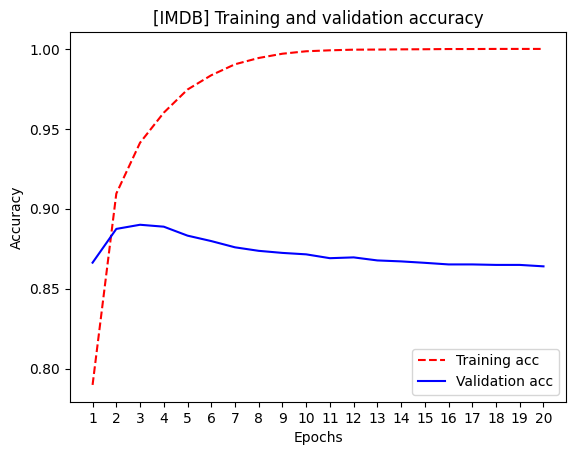

In [52]:
plot_accuracy(history.history)

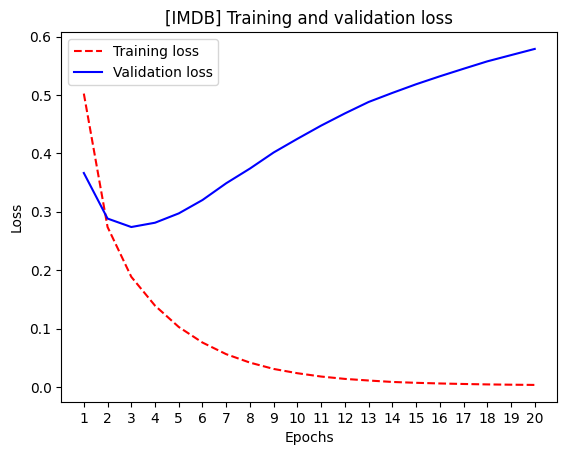

In [53]:
plot_loss(history.history)

## Conclusion
- All models overfit
- When using MSE as the loss function its scale was much different than binary_crossentropy however the gap was still similar
- All models still overfit between the 3rd and 5th / 6th epochs
- tanh has a lower validation loss than relu and took longer to climb
- the single layer model took the longest to overfit and had a more gradual descent in training loss over more epochs
- the two layers with more nodes approached a lower training loss faster starting to flatten out around 7-8 epochs than the 3 layers with less nodes per layer (16 versus 32 and 64)
